# VLE of glassy polymers

This is an example for a VLE calculation featuring a polymer and a solvent. PC-SAFT calculation for a water sorption isotherm of the polymer PVP were performed (the dotted line in Figure 2 of https://doi.org/10.3390/membranes12040434). 

In [1]:
import numpy as np
from diffusionpy import vpure,lngi,NETVLE
import matplotlib.pyplot as plt
from scipy.optimize import root,root_scalar

In [2]:
RHexp = np.asarray([9.24,29.39,44.49,59.9,73.44,87.81])
wwexp=np.asarray([2.60172,7.96358,12.56039,17.41136,23.22512,33.00029])

RHexp2 = np.asarray([0.9868,0.9858,0.9787,0.9749,0.9724,0.9685,0.9576,0.9565,0.9563,0.9217,0.89,0.8519,0.7998,0.7529])*100
wwexp2=np.asarray([0.704,0.6808,0.6142,0.593,0.5808,0.5638,0.5162,0.5096,0.506,0.4175,0.3672,0.3193,0.275,0.246])*100

In [3]:
mi=np.asarray([1.20469,1045.99])
si=np.asarray([2.797059952,2.71])
ui=np.asarray([353.95,205.599])
eAi=np.asarray([2425.67,0.])
kAi=np.asarray([0.04509,0.02])
NAi=np.asarray([1.,231.])
Mi=np.asarray([18.015,25700.])
kij=np.asarray([-0.128])
kijA=np.asarray([0.])

In [4]:
T=298.15
p=1E5
npoint=30
v0p = np.asarray([1/1506.704837])
polymer=np.asarray([False,True])
mobile=np.asarray([True,False])
ksw=np.asarray([0.4279])
vpures=vpure(p,T,mi,si,ui,eAi,kAi,NAi)
ww=np.linspace(0.0001,0.8,npoint)
def calc_isotherm():
    RHvecsaft=[]
    RHvecnet=[]
    for i,vali in enumerate(ww):
        wi=np.asarray([vali,(1-vali)])
        RHnet=NETVLE(T,wi,v0p,mobile,polymer,ksw,mi,si,ui,eAi,kAi,NAi,vpures,Mi,kij,kijA)
        RHsaft=np.exp(lngi(T,wi,mi,si,ui,eAi,kAi,NAi,vpures,Mi,kij,kijA)+np.log(wi))
        RHvecnet.append(RHnet[0])
        RHvecsaft.append(RHsaft[0])
    RHvecnet=np.asarray(RHvecnet)
    RHvecsaft=np.asarray(RHvecsaft)
    return RHvecnet,RHvecsaft

Text(0, 0.5, '$w_w$ / $10^{-2}$')

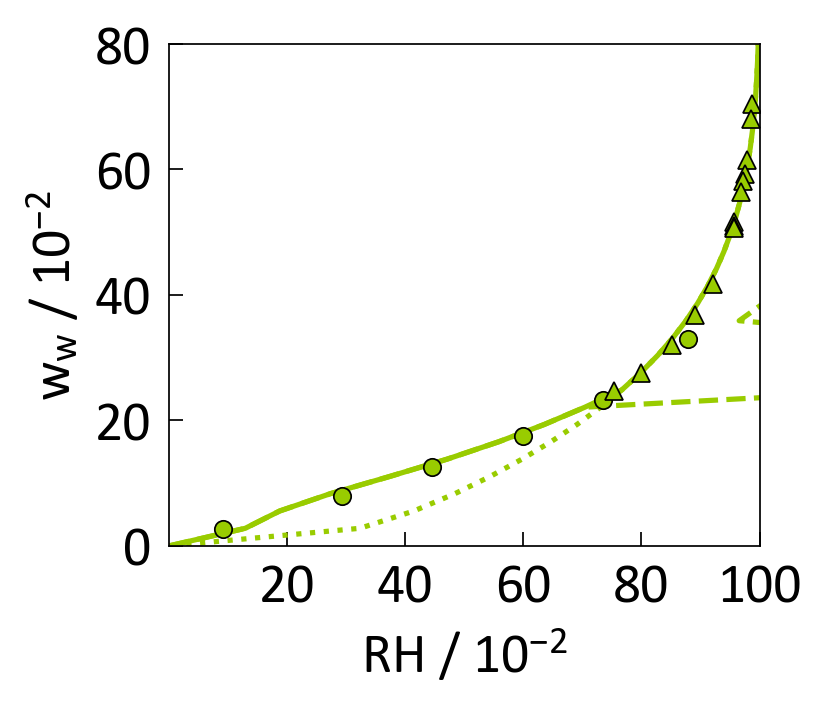

In [5]:
RHvecnet,RHvecsaft=calc_isotherm()
# RHvecnet[RHvecnet>1]=RHvecsaft[RHvecnet>1]
fig,ax=plt.subplots()
RHvec=RHvecsaft.copy() 
RHvec[RHvec>RHvecnet]=RHvecnet[RHvec>RHvecnet]
ax.plot(RHvec*100,ww*100,'C0-')
ax.plot(RHvecsaft*100,ww*100,'C0:')
ax.plot(RHvecnet*100,ww*100,'C0--')
ax.plot(RHexp,wwexp,'C0o')
ax.plot(RHexp2,wwexp2,'C0^')
 
ax.set_xticks([20,40,60,80,100])
ax.set_yticks([0,20,40,60,80])
plt.xlim([0,100])
plt.ylim([0,80])
ax.set_xlabel("RH / $10^{-2}$")
ax.set_ylabel("$w_w$ / $10^{-2}$")